In [0]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np

from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier

 # Import scikit-Learn module for train and test data
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Import modele for classification Report
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [0]:
churn = spark.read.csv("/mnt/churnfiles/ChurnTableFinal.csv", header="True",inferSchema=True,nanValue='NaN')

In [0]:
df_churn = churn.toPandas()

In [0]:
df_churn.head(5)

Out[101]:

,customer_id,first_name,last_name,dob,gender,marital_status,occupation,avg_family_size,income_level,date_onboarded,country,Age,NumProducts,Activemember,exitedcustomer,TotalLoan,AvgInterest,creditCardLimit,HasCredit,tenure,openaccounts,ExitedAll,LoanTotal,Exited,Withdrawls,Deposits,SumPositiveFeedback,SumNegativeFeedback,FeedbackRatio,balance,incomescore,numproductscore,tenurescore,avginterestscore,scoreBalance
0,160,NOREEN,MCKELVEY,12/27/1964 0:00,Female,Married,Developer I,3,Medium,1/1/2012 0:00,United States,57,4,1,0.0,1800000.0,6.500000,0.0,0,360,4,0,1800000.0,0,0,66038,16.0,NaN,16.00,66038,5,7,15,10,10
1,695,LOUISA,DANES,12/29/1957 0:00,Female,Married,Account Coordinator,2,Low,12/29/2013 0:00,United States,64,5,1,0.0,800000.0,5.200000,100000.0,1,224,5,0,800000.0,0,7753,94550,4.0,NaN,4.00,86797,0,9,15,10,10
2,8,CORT,LYSTON,1/1/1984 0:00,Male,Married,Senior Editor,3,Medium,12/28/2014 0:00,United States,38,8,1,1.0,800000.0,3.857143,50000.0,1,188,7,0,800000.0,1,0,40947,10.0,NaN,10.00,40947,5,15,15,10,10
3,773,KERI,BRINICOMBE,12/27/1981 0:00,Female,Married,Compensation Analyst,2,High,12/29/2013 0:00,United States,40,3,1,0.0,0.0,9.000000,800000.0,1,20,3,0,0.0,0,55362,34382,NaN,4.0,0.25,-20980,10,5,3,10,-1
4,835,RUSTY,WRIGHT,12/30/1951 0:00,Male,Married,Nuclear Power Engineer,2,Low,12/30/2012 0:00,United States,70,5,1,0.0,0.0,4.500000,800000.0,1,464,5,0,0.0,0,20246,208183,NaN,10.0,0.10,187937,0,9,15,10,10


In [0]:
df_churn.columns

Out[87]: Index(['customer_id', 'first_name', 'last_name', 'dob', 'gender',
 'marital_status', 'occupation', 'avg_family_size', 'income_level',
 'date_onboarded', 'country', 'Age', 'NumProducts', 'Activemember',
 'exitedcustomer', 'TotalLoan', 'AvgInterest', 'creditCardLimit',
 'HasCredit', 'tenure', 'openaccounts', 'ExitedAll', 'LoanTotal',
 'Exited', 'Withdrawls', 'Deposits', 'SumPositiveFeedback',
 'SumNegativeFeedback', 'FeedbackRatio', 'balance', 'incomescore',
 'numproductscore', 'tenurescore', 'avginterestscore', 'scoreBalance'],
 dtype='object')

In [0]:
df_churn.drop(columns=['customer_id','occupation','first_name', 'last_name', 'dob','incomescore',
       'numproductscore', 'tenurescore', 'avginterestscore', 'scoreBalance','FeedbackRatio'],inplace=True)

In [0]:
df_churn['gender'].replace({'FeMale':'Female'},inplace=True)

In [0]:
df_churn.isnull().sum()

Out[104]: gender 0
marital_status 0
avg_family_size 0
income_level 0
date_onboarded 0
country 2
Age 0
NumProducts 0
Activemember 0
exitedcustomer 7
TotalLoan 30
AvgInterest 7
creditCardLimit 16
HasCredit 0
tenure 0
openaccounts 0
ExitedAll 0
LoanTotal 7
Exited 0
Withdrawls 0
Deposits 0
SumPositiveFeedback 382
SumNegativeFeedback 745
balance 0
dtype: int64

In [0]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 24 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 gender 999 non-null object 
 1 marital_status 999 non-null object 
 2 avg_family_size 999 non-null int32 
 3 income_level 999 non-null object 
 4 date_onboarded 999 non-null object 
 5 country 997 non-null object 
 6 Age 999 non-null int32 
 7 NumProducts 999 non-null int32 
 8 Activemember 999 non-null int32 
 9 exitedcustomer 992 non-null float64
 10 TotalLoan 969 non-null float64
 11 AvgInterest 992 non-null float64
 12 creditCardLimit 983 non-null float64
 13 HasCredit 999 non-null int32 
 14 tenure 999 non-null int32 
 15 openaccounts 999 non-null int32 
 16 ExitedAll 999 non-null int32 
 17 LoanTotal 992 non-null float64
 18 Exited 999 non-null int32 
 19 Withdrawls 999 non-null int32 
 20 Deposits 999 non-null int32 
 21 SumPositiveFeedback 617 non-null float64
 22 SumNegativeFeedback 254 non-null float64
 23 balance 999 non-null int32 
dtypes: float64(7), int32(12), object(5)
memory usage: 140.6+ KB

### Replace Null values with zeros###

In [0]:
df_churn = df_churn.fillna(0)

In [0]:
df_churn.head(7)

Out[107]:

,gender,marital_status,avg_family_size,income_level,date_onboarded,country,Age,NumProducts,Activemember,exitedcustomer,TotalLoan,AvgInterest,creditCardLimit,HasCredit,tenure,openaccounts,ExitedAll,LoanTotal,Exited,Withdrawls,Deposits,SumPositiveFeedback,SumNegativeFeedback,balance
0,Female,Married,3,Medium,1/1/2012 0:00,United States,57,4,1,0.0,1800000.0,6.500000,0.0,0,360,4,0,1800000.0,0,0,66038,16.0,0.0,66038
1,Female,Married,2,Low,12/29/2013 0:00,United States,64,5,1,0.0,800000.0,5.200000,100000.0,1,224,5,0,800000.0,0,7753,94550,4.0,0.0,86797
2,Male,Married,3,Medium,12/28/2014 0:00,United States,38,8,1,1.0,800000.0,3.857143,50000.0,1,188,7,0,800000.0,1,0,40947,10.0,0.0,40947
3,Female,Married,2,High,12/29/2013 0:00,United States,40,3,1,0.0,0.0,9.000000,800000.0,1,20,3,0,0.0,0,55362,34382,0.0,4.0,-20980
4,Male,Married,2,Low,12/30/2012 0:00,United States,70,5,1,0.0,0.0,4.500000,800000.0,1,464,5,0,0.0,0,20246,208183,0.0,10.0,187937
5,Female,Married,6,High,12/28/2014 0:00,United States,69,4,1,1.0,700000.0,10.666667,800000.0,1,164,3,0,700000.0,1,5899,37655,0.0,4.0,31756
6,Female,Married,5,High,12/27/2015 0:00,United States,41,5,1,1.0,700000.0,10.666667,50000.0,1,260,3,0,700000.0,1,103049,97889,6.0,0.0,-5160


In [0]:
df_churn.drop(columns=['country','date_onboarded','exitedcustomer'],inplace=True)

###Creating Dummies for categorical Variables##

In [0]:
features = ['gender', 'marital_status','income_level']
df_onehot = df_churn.copy()


In [0]:
for col in features:
    df_onehot = pd.get_dummies(df_onehot,columns=[col], prefix = col)

In [0]:
df_onehot.head(5)

Out[112]:

,avg_family_size,Age,NumProducts,Activemember,TotalLoan,AvgInterest,creditCardLimit,HasCredit,tenure,openaccounts,ExitedAll,LoanTotal,Exited,Withdrawls,Deposits,SumPositiveFeedback,SumNegativeFeedback,balance,gender_Female,gender_Male,marital_status_Married,marital_status_Single,income_level_High,income_level_Low,income_level_Medium
0,3,57,4,1,1800000.0,6.500000,0.0,0,360,4,0,1800000.0,0,0,66038,16.0,0.0,66038,1,0,1,0,0,0,1
1,2,64,5,1,800000.0,5.200000,100000.0,1,224,5,0,800000.0,0,7753,94550,4.0,0.0,86797,1,0,1,0,0,1,0
2,3,38,8,1,800000.0,3.857143,50000.0,1,188,7,0,800000.0,1,0,40947,10.0,0.0,40947,0,1,1,0,0,0,1
3,2,40,3,1,0.0,9.000000,800000.0,1,20,3,0,0.0,0,55362,34382,0.0,4.0,-20980,1,0,1,0,1,0,0
4,2,70,5,1,0.0,4.500000,800000.0,1,464,5,0,0.0,0,20246,208183,0.0,10.0,187937,0,1,1,0,0,1,0


In [0]:
df_churn = df_onehot.copy()


In [0]:
df_churn.head(5)

Out[114]:

,avg_family_size,Age,NumProducts,Activemember,TotalLoan,AvgInterest,creditCardLimit,HasCredit,tenure,openaccounts,ExitedAll,LoanTotal,Exited,Withdrawls,Deposits,SumPositiveFeedback,SumNegativeFeedback,balance,gender_Female,gender_Male,marital_status_Married,marital_status_Single,income_level_High,income_level_Low,income_level_Medium
0,3,57,4,1,1800000.0,6.500000,0.0,0,360,4,0,1800000.0,0,0,66038,16.0,0.0,66038,1,0,1,0,0,0,1
1,2,64,5,1,800000.0,5.200000,100000.0,1,224,5,0,800000.0,0,7753,94550,4.0,0.0,86797,1,0,1,0,0,1,0
2,3,38,8,1,800000.0,3.857143,50000.0,1,188,7,0,800000.0,1,0,40947,10.0,0.0,40947,0,1,1,0,0,0,1
3,2,40,3,1,0.0,9.000000,800000.0,1,20,3,0,0.0,0,55362,34382,0.0,4.0,-20980,1,0,1,0,1,0,0
4,2,70,5,1,0.0,4.500000,800000.0,1,464,5,0,0.0,0,20246,208183,0.0,10.0,187937,0,1,1,0,0,1,0


### Scaling the datasets###

In [0]:
# Creating a list with number of columns
cols = list(df_churn.columns)  


In [0]:
#Using standard Scalar for scaling
scaler = StandardScaler()
scaler.fit(df_churn)
df_churn_scale = scaler.transform(df_churn)
df_churn_scaled = pd.DataFrame(df_churn_scale, columns=cols)

In [0]:
df_churn_scaled.head(5)

Out[117]:

,avg_family_size,Age,NumProducts,Activemember,TotalLoan,AvgInterest,creditCardLimit,HasCredit,tenure,openaccounts,ExitedAll,LoanTotal,Exited,Withdrawls,Deposits,SumPositiveFeedback,SumNegativeFeedback,balance,gender_Female,gender_Male,marital_status_Married,marital_status_Single,income_level_High,income_level_Low,income_level_Medium
0,-0.649270,0.564487,-0.402811,0.105516,0.102958,-0.384794,-0.795700,-1.456666,0.344755,-0.218852,-0.063404,0.102958,-0.755483,-0.845744,-0.662439,1.687445,-0.415836,-0.321487,1.015129,-1.015129,0.364216,-0.364216,-0.711890,-0.700746,1.411034
1,-1.338558,1.100098,0.044807,0.105516,-0.446188,-0.728723,-0.329549,0.686499,-0.294539,0.234743,-0.063404,-0.446188,-0.755483,-0.577390,-0.275165,-0.216290,-0.415836,-0.047253,1.015129,-1.015129,0.364216,-0.364216,-0.711890,1.427051,-0.708700
2,-0.649270,-0.889315,1.387659,0.105516,-0.446188,-1.083991,-0.562624,0.686499,-0.463764,1.141933,-0.063404,-0.446188,1.323656,-0.845744,-1.003246,0.735577,-0.415836,-0.652949,-0.985096,0.985096,0.364216,-0.364216,-0.711890,-0.700746,1.411034
3,-1.338558,-0.736283,-0.850428,0.105516,-0.885506,0.276609,2.933508,0.686499,-1.253480,-0.672447,-0.063404,-0.885506,-0.755483,1.070497,-1.092418,-0.850869,0.264902,-1.471028,1.015129,-1.015129,0.364216,-0.364216,1.404711,-0.700746,-0.708700
4,-1.338558,1.559193,0.044807,0.105516,-0.885506,-0.913916,2.933508,0.686499,0.833627,0.234743,-0.063404,-0.885506,-0.755483,-0.144970,1.268294,-0.850869,1.286009,1.288845,-0.985096,0.985096,0.364216,-0.364216,-0.711890,1.427051,-0.708700


### Modeling to predict customer who could exit atleast 1 of the account

#### Spliting the dataset for training and testing ###

In [0]:
X = df_churn_scaled.copy()
Y = df_churn[['Exited']]


In [0]:
X.drop(columns=['Exited','ExitedAll'],inplace=True)

In [0]:
#Spliting the dataset into to 70% train and 30% test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state =100)  

In [0]:
x_train.shape, x_test.shape

Out[121]: ((699, 23), (300, 23))

In [0]:
y_train.shape, y_test.shape

Out[122]: ((699, 1), (300, 1))

In [0]:
y_train.value_counts()/699*100

Out[123]: Exited
0 64.091559
1 35.908441
dtype: float64

**Imbalacend class dataset** <br>
In this dataset we have slight imbalanced class problem. Almost 64% of the record belongs to Existing customer category and 36%   belongs to the Exited customer category.     
ML techniques tend only to predict the majority class, hence, having major misclassification of the minority class in   comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

SMOTE (Synthetic Minority Oversampling Technique) – Oversampling <br>
This is one of the common method for oversampling the minority class. It generates virtual records of the minority class selecting one or more K-nearest neighbore for each example of the minorty class

In [0]:
%pip install imblearn

Python interpreter will be restarted.
Collecting imblearn
 Downloading imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Collecting imbalanced-learn
 Downloading imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Requirement already satisfied: joblib>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from imbalanced-learn->imblearn) (1.0.1)
Requirement already satisfied: threadpoolctl>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from imbalanced-learn->imblearn) (2.1.0)
Collecting scikit-learn>=1.1.0
 Downloading scikit_learn-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.2 MB)
Requirement already satisfied: scipy>=1.3.2 in /databricks/python3/lib/python3.8/site-packages (from imbalanced-learn->imblearn) (1.6.2)
Requirement already satisfied: numpy>=1.17.3 in /databricks/python3/lib/python3.8/site-packages (from imbalanced-learn->imblearn) (1.20.1)
Installing collected packages: scikit-learn, imbalanced-learn, imblearn
 Attempting uninstall: scikit-learn
 Found existing installation: scikit-learn 0.24.1
 Not uninstalling scikit-learn at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-dead2c6b-008d-48e5-af2f-79d96bc2f6d7
 Can't uninstall 'scikit-learn'. No files were found to uninstall.
Successfully installed imbalanced-learn-0.9.1 imblearn-0.0 scikit-learn-1.1.1
Python interpreter will be restarted.

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [0]:
y_train_res.value_counts()

Out[125]: Exited
0 448
1 448
dtype: int64

#### Defining function for Gridsearch

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

####Defining function for classification

In [0]:
def do_classify(clf, parameters,xtrain,ytrain,xtest,ytest):
    clf = cv_optimize(clf, parameters, xtrain, ytrain)
    clf=clf.fit(xtrain, ytrain)
    training_accuracy = clf.score(xtrain, ytrain)
    test_accuracy = clf.score(xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    y_pred = clf.predict(xtest)
    pl = confusion_matrix(ytest,y_pred)
    ax = sns.heatmap(pl, annot=True, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    print(classification_report(ytest,y_pred))
    return 

In [0]:
# Defining a function for cross validation
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func='accuracy'):
    nfold = 5
    kfold = KFold(n_splits=nfold)
    result = cross_val_score(clf,x,y,cv = kfold,scoring =score_func)
    return result.mean()

#### Logistic Regression

BEST PARAMS {'C': 1}
Accuracy on training data: 1.00
Accuracy on test data: 1.00
 precision recall f1-score support

 0 1.00 1.00 1.00 188
 1 1.00 1.00 1.00 112

 accuracy 1.00 300
 macro avg 1.00 1.00 1.00 300
weighted avg 1.00 1.00 1.00 300

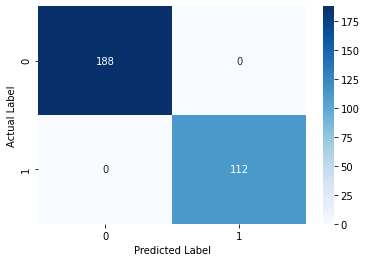

In [0]:
# Funtion call with Logistic Regression
do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]},x_train_res, y_train_res,x_test,y_test)

In [0]:
# Build the model with the best parameter
c = 1
model_l = LogisticRegression(C=c)
model_l.fit(x_train_res, y_train_res)
y_pred_l = model_l.predict(x_test)

accuracy_level = accuracy_score(y_test,y_pred_l)
print(("Accuracy: %.3f%%") % (accuracy_level*100.0))

Accuracy: 100.000%

In [0]:
# Prediction with the selected model
y_prob_l = model_l.predict_proba(x_test)[:,1]
fpr_l , tpr_l , thresholds = roc_curve(y_test,y_prob_l)
auc_l = roc_auc_score(y_test,y_pred_l)

In [0]:
# Accuracy from cross validation
cv_score(model_l,x_train_res,y_train_res)

Out[135]: 1.0

In [0]:
#Updating the table with the best model results
result_df = pd.DataFrame(columns=['classifiers', 'Accuracy','AUC'])

result_df=result_df.append({'classifiers':'LogisticRegression','Accuracy': round(accuracy_level*100.0,2),
                                                                                'AUC':auc_l}, ignore_index=True)

####Random Forest Classifier

BEST PARAMS {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'n_estimators': 500}
Accuracy on training data: 1.00
Accuracy on test data: 0.92
 precision recall f1-score support

 0 0.89 0.99 0.94 188
 1 0.99 0.79 0.88 112

 accuracy 0.92 300
 macro avg 0.94 0.89 0.91 300
weighted avg 0.93 0.92 0.92 300

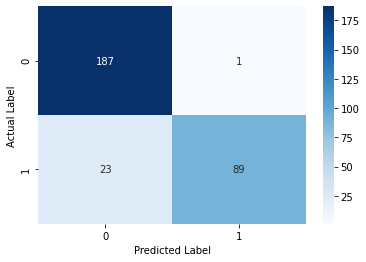

In [0]:
# Setting up the parameters for grid search
param_grid = {'n_estimators':[50,100,500],'max_depth': [2, 4, 8, 15], 'max_features': [None, 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

# Calling  the classify function with the grid param
do_classify(RandomForestClassifier(), param_grid,x_train_res, y_train_res,x_test,y_test)

In [0]:
#Building the model with best parameters
model_RF = RandomForestClassifier(n_estimators=500, criterion= 'entropy', max_depth= 15, max_features=None)
model_RF.fit(x_train_res, y_train_res)
y_pred_rf = model_RF.predict(x_test)

accuracy_level_rf = accuracy_score(y_test,y_pred_rf)
print(("Accuracy: %.3f%%") % (accuracy_level_rf*100.0))

Accuracy: 92.333%

In [0]:
# Prediction using best param
y_prob_rf = model_RF.predict_proba(x_test)[:,1]
fpr_rf , tpr_rf , thresholds = roc_curve(y_test,y_prob_rf)

auc_rf = roc_auc_score(y_test,y_pred_rf)

In [0]:
# Accuracy from cross validation
cv_score(model_RF,x_train_res,y_train_res)

Out[140]: 0.9397827436374924

23

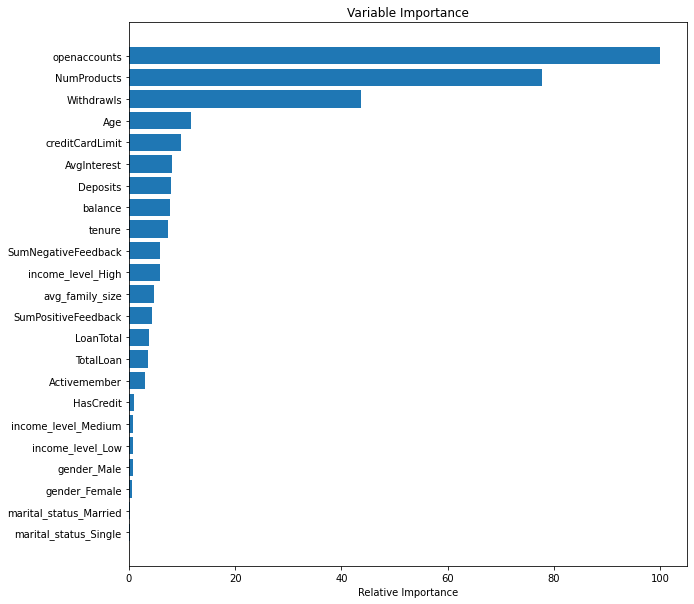

In [0]:
feature_importance = model_RF.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:23]
sorted_idx = np.argsort(feature_importance)[:28]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [0]:
#Updating the table with the best model results
result_df=result_df.append({'classifiers':'RandomForest','Accuracy': round(accuracy_level_rf*100.0,2),
                                                                                'AUC':auc_rf}, ignore_index=True)

#### XGBOOST Classifier

In [0]:
%pip install xgboost

Python interpreter will be restarted.
Collecting xgboost
 Downloading xgboost-1.6.1-py3-none-manylinux2014_x86_64.whl (192.9 MB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.20.1)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.6.2)
Installing collected packages: xgboost
Successfully installed xgboost-1.6.1
Python interpreter will be restarted.

In [0]:
# Import XGB classifier

from xgboost.sklearn import XGBClassifier

BEST PARAMS {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 0.05}
Accuracy on training data: 1.00
Accuracy on test data: 0.97
 precision recall f1-score support

 0 0.96 1.00 0.98 188
 1 1.00 0.93 0.96 112

 accuracy 0.97 300
 macro avg 0.98 0.96 0.97 300
weighted avg 0.97 0.97 0.97 300

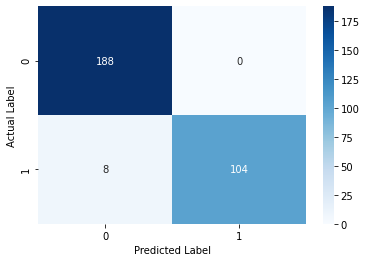

In [0]:
param_grid = {'n_estimators':[50,100,150],'max_depth':[3,5,7],
              'learning_rate': [0.001,0.05,0.1,0.2],'reg_alpha':[0.001,0.005,0.01,0.05],
              'colsample_bytree': [0.50,1]}

# Calling  the classify function with the grid param
do_classify(XGBClassifier(objective='binary:logistic'), param_grid,x_train_res, y_train_res,x_test,y_test)

In [0]:
model_XGB = XGBClassifier(objective='binary:logistic',learning_rate=0.02,n_estimators=150, max_depth= 3, colsample_bytree=1,reg_alpha=0.05)
model_XGB.fit(x_train_res, y_train_res)
y_pred_xgb = model_XGB.predict(x_test)

accuracy_level_xgb = accuracy_score(y_test,y_pred_xgb)
print(("Accuracy: %.3f%%") % (accuracy_level_xgb*100.0))

Accuracy: 90.667%

In [0]:
y_prob_xgb = model_XGB.predict_proba(x_test)[:,1]
fpr_xgb , tpr_xgb , thresholds = roc_curve(y_test,y_prob_xgb)
auc_xgb = roc_auc_score(y_test,y_pred_xgb)

In [0]:
# Accuracy from cross validation
cv_score(model_XGB,x_train_res,y_train_res)

Out[148]: 0.9062631905648665

In [0]:

#Updating the table with the best model results
result_df=result_df.append({'classifiers':'XGBoost','Accuracy': round(accuracy_level_xgb*100.0,2),
                                                                                'AUC':auc_xgb}, ignore_index=True)

23

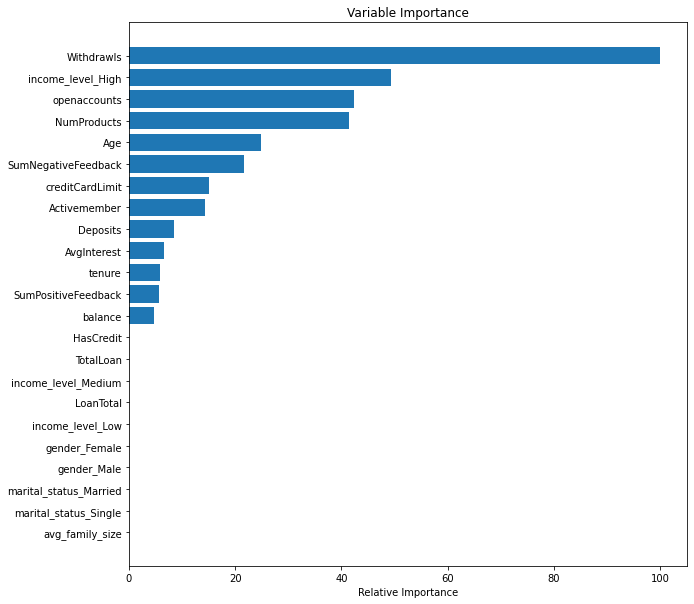

In [0]:
feature_importance = model_XGB.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:23]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

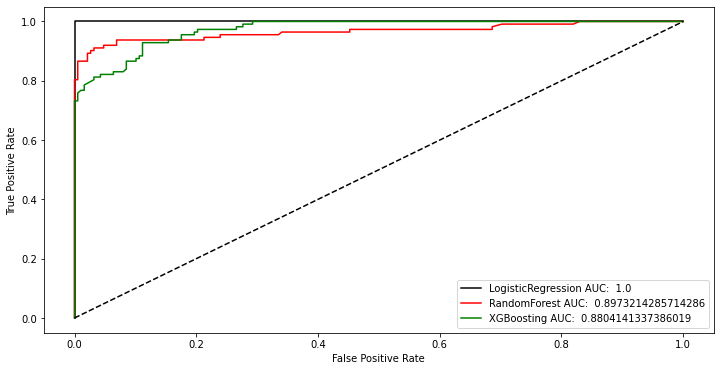

In [0]:
plt.figure(figsize = (12,6))

plt.plot(fpr_l, tpr_l, 'k',label= "LogisticRegression AUC:  "+str(auc_l))
plt.plot(fpr_rf, tpr_rf, 'r',label= "RandomForest AUC:  "+str(auc_rf))
plt.plot(fpr_xgb, tpr_xgb, 'g',label= "XGBoosting AUC:  "+str(auc_xgb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()

In [0]:
result_df

Out[152]:

,classifiers,Accuracy,AUC
0,LogisticRegression,100.00,1.000000
1,RandomForest,92.33,0.897321
2,XGBoost,90.67,0.880414


#### Modeling  ExitedAll## <br>

There are only 4 customers who exited all in the dataset. This a severe case of imbalanced class. The SMOTE sampling technique will not work here, since it needs atleast 6 records in the minorty class.  Hence, taking 100 sample records from the traning set and resampling the minority class.

In [0]:
X1 = df_churn_scaled.copy()
Y1 = df_churn[['ExitedAll']]

In [0]:
X1.drop(columns=['Exited','ExitedAll'],inplace=True)

In [0]:
#Spliting the dataset into to 70% train and 30% test set
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, random_state =100)  

In [0]:
y_train.shape, y_test.shape

Out[241]: ((699, 1), (300, 1))

In [0]:
x_train.shape, x_test.shape

Out[242]: ((699, 23), (300, 23))

In [0]:
y_train.value_counts()

Out[243]: ExitedAll
0 695
1 4
dtype: int64

In [0]:
y_test.value_counts()

Out[244]: ExitedAll
0 300
dtype: int64

In [0]:
test_sample = pd. merge(x_train, y_train, left_index=True, right_index=True)

In [0]:
testing_samples = test_sample[test_sample['ExitedAll']==1]

In [0]:
testing_samples

Out[247]:

,avg_family_size,Age,NumProducts,Activemember,TotalLoan,AvgInterest,creditCardLimit,HasCredit,tenure,openaccounts,LoanTotal,Withdrawls,Deposits,SumPositiveFeedback,SumNegativeFeedback,balance,gender_Female,gender_Male,marital_status_Married,marital_status_Single,income_level_High,income_level_Low,income_level_Medium,ExitedAll
588,0.729307,-0.430220,-0.850428,-9.477245,-0.885506,1.863976,0.602753,0.686499,-1.25348,-2.033232,-0.885506,0.705954,-1.472180,-0.850869,-0.415836,-1.701245,1.015129,-1.015129,0.364216,-0.364216,-0.71189,-0.700746,1.411034,1
964,0.040019,-0.583252,-1.745663,-9.477245,-0.885506,2.657659,-0.562624,0.686499,-1.25348,-2.033232,-0.885506,-0.845744,-1.212381,-0.216290,-0.415836,-0.856349,1.015129,-1.015129,0.364216,-0.364216,-0.71189,-0.700746,1.411034,1
82,-0.649270,0.028875,-1.298046,-9.477245,-0.885506,1.863976,0.602753,0.686499,-1.25348,-2.033232,-0.885506,0.430850,-1.559423,-0.850869,-0.415836,-1.681099,1.015129,-1.015129,0.364216,-0.364216,-0.71189,-0.700746,1.411034,1
880,0.729307,0.181907,-1.745663,-9.477245,-0.885506,2.128537,-0.329549,0.686499,-1.25348,-2.033232,-0.885506,-0.845744,-1.192306,-0.850869,0.094717,-0.836824,-0.985096,0.985096,0.364216,-0.364216,-0.71189,1.427051,-0.708700,1


Taking 100 samples from the traning set

In [0]:
temp = test_sample.sample(n=100, random_state=1)

In [0]:
temp

Out[249]:

,avg_family_size,Age,NumProducts,Activemember,TotalLoan,AvgInterest,creditCardLimit,HasCredit,tenure,openaccounts,LoanTotal,Withdrawls,Deposits,SumPositiveFeedback,SumNegativeFeedback,balance,gender_Female,gender_Male,marital_status_Married,marital_status_Single,income_level_High,income_level_Low,income_level_Medium,ExitedAll
626,1.418596,-1.501442,1.387659,0.105516,1.695483,1.070292,1.068904,0.686499,0.532783,1.141933,1.695483,-0.474035,1.277340,0.735577,-0.415836,1.423234,-0.985096,0.985096,-2.745626,2.745626,1.404711,-0.700746,-0.708700,0
294,-0.649270,-0.353704,0.940042,0.105516,1.860227,-0.384794,2.933508,0.686499,1.566935,1.141933,1.860227,-0.845744,-0.302575,-0.533579,-0.415836,0.028508,-0.985096,0.985096,0.364216,-0.364216,-0.711890,-0.700746,1.411034,0
643,-1.338558,1.176614,0.044807,0.105516,-0.446188,-0.120233,-0.795700,-1.456666,-0.727003,-0.218852,-0.446188,0.938345,1.065475,-0.850869,0.605271,0.678129,-0.985096,0.985096,0.364216,-0.364216,-0.711890,1.427051,-0.708700,0
456,-0.649270,-0.353704,2.282894,0.105516,0.597190,-0.318653,0.602753,0.686499,0.495177,2.502719,0.597190,0.559472,0.884769,0.418288,-0.415836,0.646979,1.015129,-1.015129,0.364216,-0.364216,-0.711890,1.427051,-0.708700,0
281,0.040019,1.406161,1.387659,0.105516,2.244629,0.144329,0.602753,0.686499,2.131018,1.595528,2.244629,0.855793,1.766119,2.322023,-0.415836,1.391067,1.015129,-1.015129,0.364216,-0.364216,-0.711890,1.427051,-0.708700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,0.729307,0.028875,0.044807,0.105516,-0.610932,0.607311,0.602753,0.686499,-0.745806,0.234743,-0.610932,-0.845744,1.266813,-0.533579,-0.415836,1.554862,1.015129,-1.015129,0.364216,-0.364216,1.404711,-0.700746,-0.708700,0
938,0.040019,1.100098,-2.193281,-9.477245,-0.885506,-2.104441,-0.795700,-1.456666,-1.347494,-2.033232,-0.885506,-0.845744,-1.559423,-0.850869,-0.415836,-1.193874,1.015129,-1.015129,0.364216,-0.364216,-0.711890,1.427051,-0.708700,0
988,0.040019,0.641002,-0.850428,0.105516,0.048043,1.334854,-0.795700,-1.456666,-0.501370,-0.672447,0.048043,-0.080036,-0.679173,-0.850869,0.264902,-0.630002,1.015129,-1.015129,0.364216,-0.364216,-0.711890,-0.700746,1.411034,0
687,0.040019,-0.736283,-1.298046,0.105516,-0.885506,0.012048,-0.329549,0.686499,-1.253480,-1.126042,-0.885506,-0.557833,-1.128996,-0.216290,-0.415836,-0.885135,-0.985096,0.985096,0.364216,-0.364216,-0.711890,-0.700746,1.411034,0


In [0]:
final_sample = testing_samples.append(temp)

In [0]:
final_sample.shape

Out[251]: (104, 24)

Resampling from the 100 record for the minority class

In [0]:
df_majority = final_sample[final_sample.ExitedAll==0]
df_minority = final_sample[final_sample.ExitedAll==1]

In [0]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=100,    # to match majority class
                                 random_state=123) 

In [0]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [0]:
x_train_res = df_upsampled .copy()
y_train_res = df_upsampled [['ExitedAll']]

In [0]:
x_train_res.drop(columns=['ExitedAll'],inplace=True)

In [0]:
y_train_res.value_counts()

Out[257]: ExitedAll
1 100
0 99
dtype: int64

###Logistic Regression##

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.99
Accuracy on test data: 0.99
 precision recall f1-score support

 0 1.00 0.99 0.99 300
 1 0.00 0.00 0.00 0

 accuracy 0.99 300
 macro avg 0.50 0.49 0.50 300
weighted avg 1.00 0.99 0.99 300

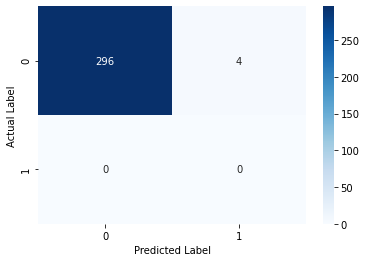

In [0]:
# Funtion call with Logistic Regression
do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]},x_train_res, y_train_res,x_test,y_test)

The y_test didnt have any ExitedAll records. so, the precision and recall score is 0. From the confusion matrix, the model seems to misclassify 4 records

In [0]:
c = 0.01
model_l = LogisticRegression(C=c)
model_l.fit(x_train_res, y_train_res)
y_pred_l = model_l.predict(x_test)

accuracy_level = accuracy_score(y_test,y_pred_l)
print(("Accuracy: %.3f%%") % (accuracy_level*100.0))

Accuracy: 98.667%

In [0]:
# accuracy with Cross validation
cv_score(model_l,x_train_res,y_train_res)

Out[260]: 0.9949999999999999

###Random Forest###

BEST PARAMS {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'n_estimators': 50}
Accuracy on training data: 1.00
Accuracy on test data: 0.99
 precision recall f1-score support

 0 1.00 0.99 0.99 300
 1 0.00 0.00 0.00 0

 accuracy 0.99 300
 macro avg 0.50 0.49 0.50 300
weighted avg 1.00 0.99 0.99 300

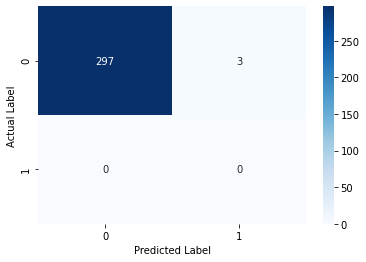

In [0]:
# Setting up the parameters for grid search
param_grid = {'n_estimators':[50,100,500],'max_depth': [2, 4, 8, 15], 'max_features': [None, 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

# Calling  the classify function with the grid param
do_classify(RandomForestClassifier(), param_grid,x_train_res, y_train_res,x_test,y_test)

The y_test didnt have any ExitedAll records. so, the precision and recall score is 0. From the confusion matrix, the model seems to misclassify 3 records

In [0]:
model_RF = RandomForestClassifier(n_estimators=50, criterion= 'gini', max_depth= 2, max_features=None)
model_RF.fit(x_train_res, y_train_res)
y_pred_rf = model_RF.predict(x_test)

accuracy_level_rf = accuracy_score(y_test,y_pred_rf)
print(("Accuracy: %.3f%%") % (accuracy_level_rf*100.0))

Accuracy: 100.000%

In [0]:

# Accuracy from cross validation
cv_score(model_RF,x_train_res,y_train_res)

Out[268]: 0.9949999999999999

23

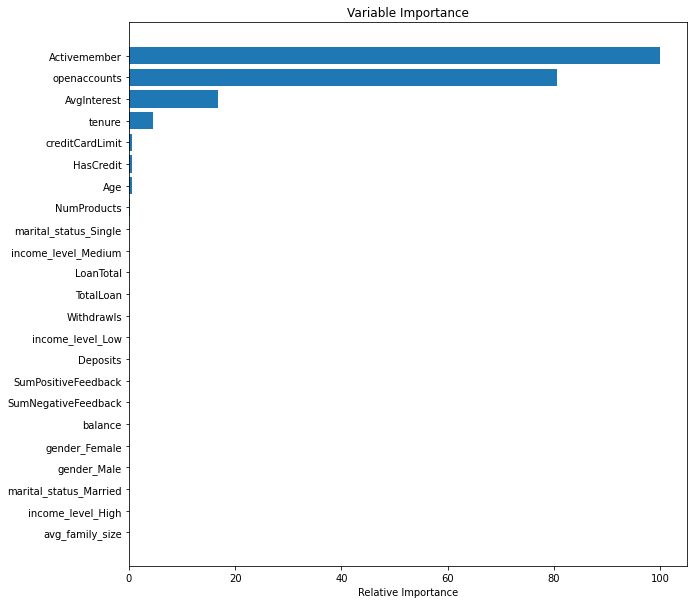

In [0]:

feature_importance = model_RF.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

###XGBOOST###

BEST PARAMS {'colsample_bytree': 0.5, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0.001}
Accuracy on training data: 0.99
Accuracy on test data: 0.99
 precision recall f1-score support

 0 1.00 0.99 0.99 300
 1 0.00 0.00 0.00 0

 accuracy 0.99 300
 macro avg 0.50 0.49 0.50 300
weighted avg 1.00 0.99 0.99 300

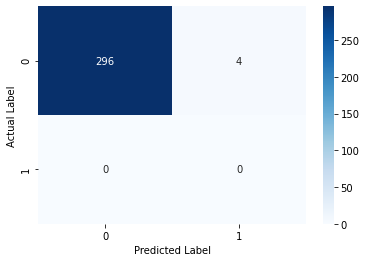

In [0]:
param_grid = {'n_estimators':[50,100,150],'max_depth':[3,5,7],
              'learning_rate': [0.001,0.05,0.1,0.2],'reg_alpha':[0.001,0.005,0.01,0.05],
              'colsample_bytree': [0.50,1]}

# Calling  the classify function with the grid param
do_classify( XGBClassifier(objective='binary:logistic'), param_grid,x_train_res, y_train_res,x_test,y_test)

In [0]:
model_XGB = XGBClassifier(objective='binary:logistic',learning_rate=0.001,n_estimators=50, max_depth= 3, colsample_bytree=0.5,reg_alpha=0.001)
model_XGB.fit(x_train_res, y_train_res)
y_pred_xgb = model_XGB.predict(x_test)

accuracy_level_xgb = accuracy_score(y_test,y_pred_xgb)
print(("Accuracy: %.3f%%") % (accuracy_level_xgb*100.0))

Accuracy: 98.667%

In [0]:

# Accuracy from cross validation
cv_score(model_XGB,x_train_res,y_train_res)

Out[273]: 0.9949999999999999

23

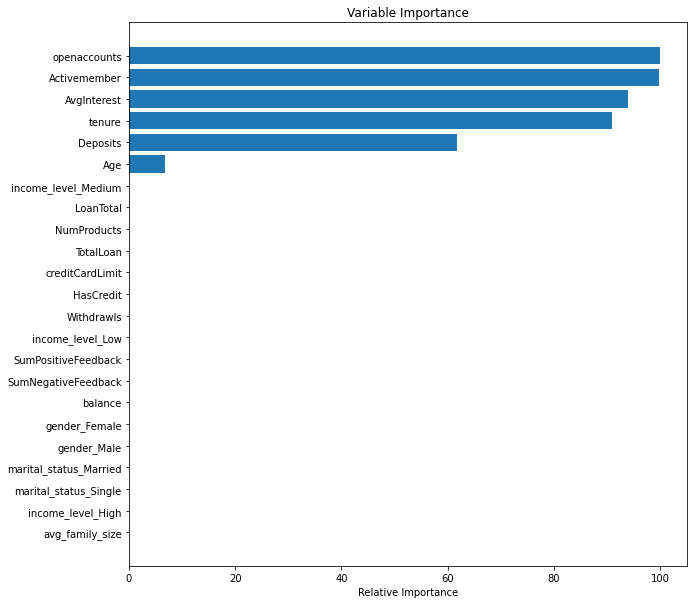

In [0]:
feature_importance = model_XGB.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:23]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()